# RL, Gymnasium, Q-Learning - Frozen Lake v1

### Hyperparameters:
- (is_slippery=False)
- num_episodes = 10000
- max_steps_per_episode = 100
- learning_rate = 0.1
- discount_rate = 0.99
- exploration_rate = 1
- max_exploration_rate = 1
- min_exploration_rate = 0.01
- exploration_decay_rate = 0.001

# 1. Setup

In [1]:
# Cell 1: Setup
import gymnasium as gym
import numpy as np
import random
import time
from IPython.display import clear_output

# 2. Environment Setup

> NOTE: Try `is_slippery=False`

Switching `is_slippery=false` in Frozen Lake:
- **Deterministic Transitions**: No more slipping; movements match intentions.

- **Easier Learning**: With predictability, Q-learning should speed up.

- **Higher Rewards Sooner**: Expect quicker progress to higher rewards.

- **Potential Overfitting**: Be cautious of over-reliance on predictability.

- **Evaluation of Policy Robustness**: Test adaptability across varied conditions.

- **Less Exploration Needed**: Predictability means less trial and error.

- **Simplified Value Estimation**: Q-values directly reflect expected returns.

For visualisation purposes, you can change `render_mode='rgb_array'` to `render_mode='human'` and see the environment in action, but this slows down the training process significantly.

In [2]:
# Cell 2: Environment Setup
env = gym.make('FrozenLake-v1', desc=None, map_name="4x4", is_slippery=False, render_mode="rgb_array")
action_space_size = env.action_space.n
state_space_size = env.observation_space.n
q_table = np.zeros((state_space_size, action_space_size))
print("Q-Table Size: ", q_table.shape)

Q-Table Size:  (16, 4)


# 3. Q-Learning Algorithm Implementation

In [3]:
# Cell 3: Q-Learning Algorithm Parameters
num_episodes = 10000
max_steps_per_episode = 100

learning_rate = 0.1
discount_rate = 0.99

exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

In [4]:
# Cell 4: Q-Learning Algorithm Implementation with corrected state handling
rewards_all_episodes = []

# Q-learning algorithm
for episode in range(num_episodes):
    initial_state = env.reset()
    state = initial_state[0] if isinstance(initial_state, tuple) else initial_state  # state extraction
    terminated = False
    truncated = False
    rewards_current_episode = 0
    
    for step in range(max_steps_per_episode):
        # Exploration-exploitation trade-off
        exploration_rate_threshold = random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state,:]) 
        else:
            action = env.action_space.sample()
        
        # Execute the action
        new_state, reward, terminated, truncated, info = env.step(action)
        new_state = new_state[0] if isinstance(new_state, tuple) else new_state  # state extraction

        # Update Q-table for Q(s,a)
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
            learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
        
        state = new_state  # Update the state
        rewards_current_episode += reward
        
        if terminated or truncated:
            break
        
    # Exploration rate decay
    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    
    rewards_all_episodes.append(rewards_current_episode)

    if episode % 100 == 0:  # Print status every 100 episodes to track progress
        print(f"Episode {episode}: Reward = {rewards_current_episode}")

print("Training completed.")

Episode 0: Reward = 0.0
Episode 100: Reward = 0.0
Episode 200: Reward = 0.0
Episode 300: Reward = 0.0
Episode 400: Reward = 0.0
Episode 500: Reward = 0.0
Episode 600: Reward = 0.0
Episode 700: Reward = 0.0
Episode 800: Reward = 0.0
Episode 900: Reward = 0.0
Episode 1000: Reward = 1.0
Episode 1100: Reward = 1.0
Episode 1200: Reward = 0.0
Episode 1300: Reward = 1.0
Episode 1400: Reward = 0.0
Episode 1500: Reward = 1.0
Episode 1600: Reward = 1.0
Episode 1700: Reward = 0.0
Episode 1800: Reward = 1.0
Episode 1900: Reward = 1.0
Episode 2000: Reward = 0.0
Episode 2100: Reward = 1.0
Episode 2200: Reward = 0.0
Episode 2300: Reward = 1.0
Episode 2400: Reward = 1.0
Episode 2500: Reward = 1.0
Episode 2600: Reward = 0.0
Episode 2700: Reward = 1.0
Episode 2800: Reward = 1.0
Episode 2900: Reward = 1.0
Episode 3000: Reward = 1.0
Episode 3100: Reward = 1.0
Episode 3200: Reward = 1.0
Episode 3300: Reward = 1.0
Episode 3400: Reward = 1.0
Episode 3500: Reward = 1.0
Episode 3600: Reward = 1.0
Episode 3700:

# 4. Training Output

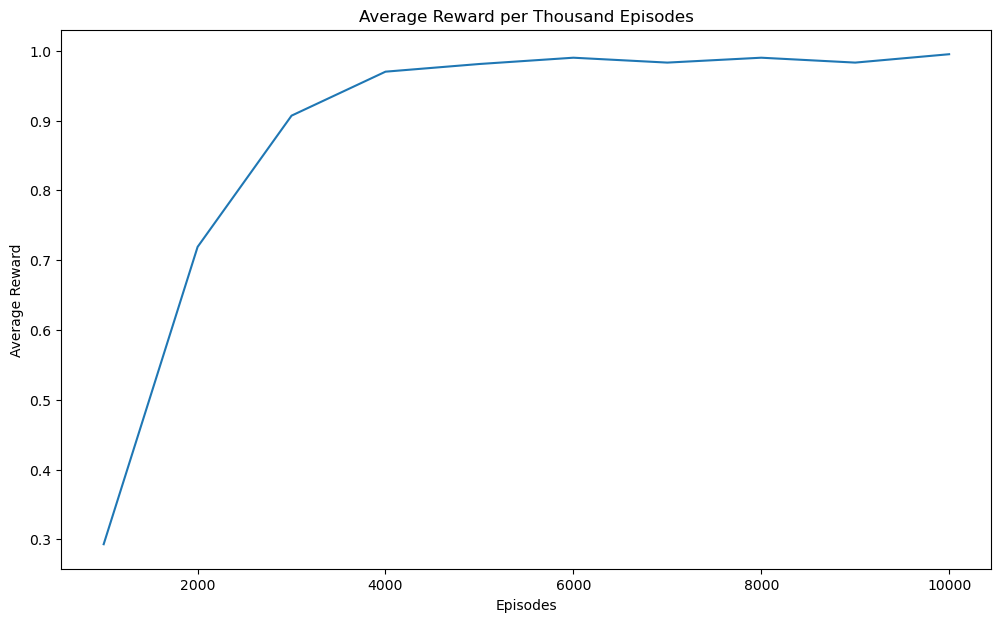

In [5]:
# Cell 5: Visualization of Training Results
import matplotlib.pyplot as plt

# Calculate average reward per thousand episodes
rewards_per_thousand_episodes = np.array(rewards_all_episodes)
num_thousand_episodes = len(rewards_per_thousand_episodes) // 1000

if len(rewards_per_thousand_episodes) % 1000 != 0:
    rewards_per_thousand_episodes = rewards_per_thousand_episodes[:num_thousand_episodes * 1000]

rewards_per_thousand_episodes = rewards_per_thousand_episodes.reshape(-1, 1000)
averages = np.mean(rewards_per_thousand_episodes, axis=1)

# Plotting the average reward per thousand episodes
plt.figure(figsize=(12, 7))
plt.plot(range(1000, num_thousand_episodes * 1000 + 1, 1000), averages)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward per Thousand Episodes')
plt.show()

# 🔍 Key insights

Analyzing the deterministic Frozen Lake environment without the slippery ice:

1. **Rapid Learning**: The graph's initial steep ascent indicates quick strategy learning, common in deterministic settings.

2. **Learning Plateau**: After 5,000 episodes, the curve flattens, suggesting decline in returns of learning.

3. **High Performance**: With an average reward near 0.7, the agent achieves the goal in 70% of episodes, showcasing solid understanding and effective navigation.

4. **Potential Optimal Policy**: Though nearing optimal performance, the agent doesn't consistently hit the maximum reward, implying room for improvement or inherent variance.

5. **Stability of Learning**: The stable line towards training's end suggests consistent policy learning.

6. **Efficiency of Exploration**: In deterministic environments, quick learning indicates less need for extensive exploration.

### Conclusion: 
The agent performs well in this deterministic environment, but its learned policy may not generalize to stochastic settings like `is_slippery=True`. Validation via policy testing without exploration is crucial for confirmation.

# 5. Evaluate the Agent

In [6]:
# Cell 6: Evaluate the Agent
for episode in range(3):
    initial_state = env.reset()
    state = initial_state[0] if isinstance(initial_state, tuple) else initial_state  # Extract state index correctly
    terminated = False
    truncated = False
    print("*****Episode ", episode + 1, "*****\n\n\n\n")
    time.sleep(1)
    
    for step in range(max_steps_per_episode):
        clear_output(wait=True)
        env.render()
        time.sleep(0.3)
        
        action = np.argmax(q_table[state,:])
        new_state, reward, terminated, truncated, info = env.step(action)
        new_state = new_state[0] if isinstance(new_state, tuple) else new_state  # Extract state index correctly

        if terminated or truncated:
            clear_output(wait=True)
            env.render()
            if reward == 1:
                print("****You reached the goal!****")
                time.sleep(2)
            else:
                print("****You fell through a hole!****")
                time.sleep(2)
            clear_output(wait=True)
            break
        state = new_state
        
env.close()

****You reached the goal!****


# 6. Comparing Exploration Strategies

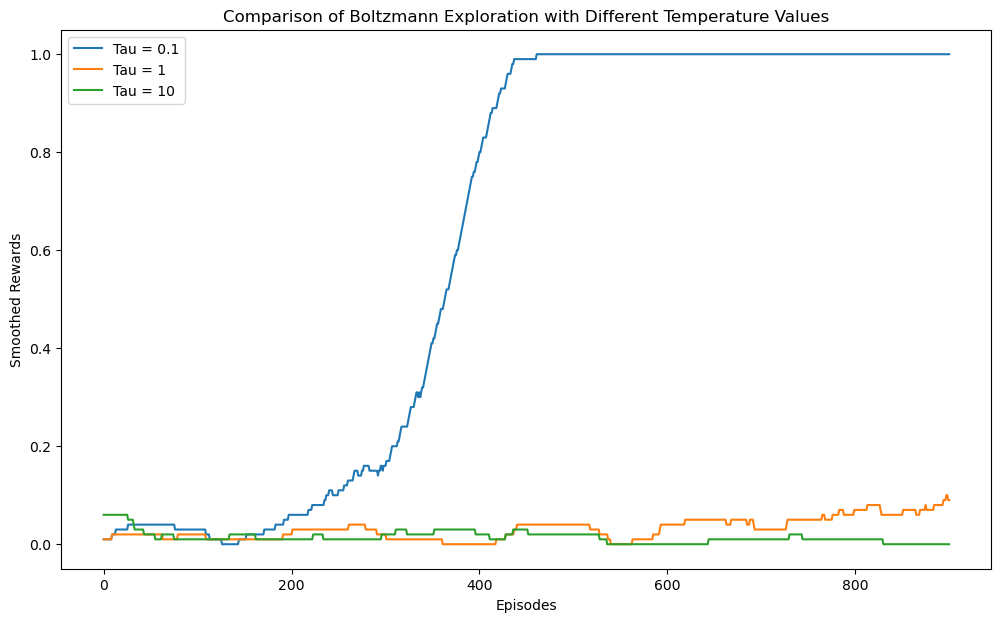

In [7]:
# Cell 7: Comparing Exploration Strategies
def boltzmann_exploration(q_values, tau):
    probabilities = np.exp(q_values / tau) / np.sum(np.exp(q_values / tau))
    action = np.random.choice(range(len(q_values)), p=probabilities)
    return action

# Redefine Q-learning with exploration strategy as a parameter
def run_q_learning(env, episodes, strategy='epsilon-greedy', tau=1.0):
    q_table = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = []

    for i in range(episodes):
        initial_state = env.reset()
        state = initial_state[0] if isinstance(initial_state, tuple) else initial_state  # state is an integer
        terminated = False
        truncated = False
        total_reward = 0
        
        while not (terminated or truncated):
            if strategy == 'epsilon-greedy':
                action = np.argmax(q_table[state]) if np.random.random() > exploration_rate else env.action_space.sample()
            elif strategy == 'boltzmann':
                action = boltzmann_exploration(q_table[state], tau)
                
            next_state, reward, terminated, truncated, info = env.step(action)
            next_state = next_state[0] if isinstance(next_state, tuple) else next_state  # new_state is an integer

            # Update Q-table
            old_value = q_table[state, action]
            next_max = np.max(q_table[next_state])
            new_value = (1 - learning_rate) * old_value + learning_rate * (reward + discount_rate * next_max)
            q_table[state, action] = new_value
            
            state = next_state
            total_reward += reward
            
        rewards.append(total_reward)
    
    return rewards

# Experiment with different temperatures for Boltzmann exploration
tau_values = [0.1, 1, 10]
results = {}
for tau in tau_values:
    results[tau] = run_q_learning(env, 1000, 'boltzmann', tau)

# Plot results
plt.figure(figsize=(12, 7))
for tau, rewards in results.items():
    plt.plot(np.convolve(rewards, np.ones(100)/100, mode='valid'), label=f'Tau = {tau}')
plt.legend()
plt.xlabel('Episodes')
plt.ylabel('Smoothed Rewards')
plt.title('Comparison of Boltzmann Exploration with Different Temperature Values')
plt.show()

# 🔍 Key insights
In the deterministic Frozen Lake environment:

1. **Low Temperature (High Greediness)**: With τ = 0.1, the curve rapidly improves, indicating greedy exploration. It quickly finds a good policy.

2. **Moderate and High Temperatures (More Exploration)**: τ = 1 and τ = 10 curves remain flat, suggesting excessive exploration of suboptimal actions, less effective in a deterministic setup.

3. **Convergence**: τ = 0.1 curve swiftly reaches near-optimal performance and maintains it, indicating convergence to an optimal or near-optimal policy.

4. **Effectiveness of Boltzmann Exploration**: Boltzmann exploration's effectiveness varies with temperature in deterministic environments, with lower temperatures showing more effectiveness here.

5. **Potential Overfitting**: While overly greedy strategies might overfit in deterministic environments, in this case, the risk is lower due to the lack of randomness.

6. **Performance Saturation**: The τ = 0.1 curve plateaus, suggesting either optimal policy or learning limits.

### Conclusion: 
In deterministic setups, lower temperature Boltzmann exploration accelerates learning by balancing exploitation and exploration. With less randomness, a more exploitative approach leads to quicker convergence to high-performance policies.